In [ ]:
# So the hypothesis is that some players overperform


In [58]:
# Get all Title Tuesday results over last year
import requests
import requests
from bs4 import BeautifulSoup
import re

links = []
for each in range(10):

    r = requests.get(f'https://www.chess.com/tournament/live/titled-tuesdays?&page={each}')
    soup = BeautifulSoup(r.content, 'html.parser')
    elements = soup.find_all('a',class_='tournaments-live-name')
    for every in elements:
        link  = every.get('href')
        links.append(link)


In [74]:
ids = [each.split('/')[-1] for each in links]
ids


['late-titled-tuesday-blitz-october-24-2023-4335032',
 'early-titled-tuesday-blitz-october-24-2023-4335031',
 'late-titled-tuesday-blitz-october-17-2023-4321890',
 'early-titled-tuesday-blitz-october-17-2023-4321889',
 'late-titled-tuesday-blitz-october-10-2023-4318637',
 'early-titled-tuesday-blitz-october-10-2023-4318636',
 'late-titled-tuesday-blitz-october-03-2023-4305323',
 'early-titled-tuesday-blitz-october-03-2023-4305322',
 'late-titled-tuesday-blitz-september-26-2023-4293686',
 'early-titled-tuesday-blitz-september-26-2023-4293685',
 'late-titled-tuesday-blitz-september-19-2023-4292109',
 'early-titled-tuesday-blitz-september-19-2023-4292108',
 'late-titled-tuesday-blitz-september-12-2023-4265731',
 'early-titled-tuesday-blitz-september-12-2023-4265730',
 'late-titled-tuesday-blitz-september-05-2023-4265729',
 'early-titled-tuesday-blitz-september-05-2023-4265728',
 'late-titled-tuesday-blitz-august-29-2023-4252459',
 'early-titled-tuesday-blitz-august-29-2023-4252458',
 'lat

In [76]:
import requests
import pandas as pd
import tqdm

def get_game(id):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    response = requests.get(f'https://api.chess.com/pub/tournament/{id}', headers=headers)
    game = response.json()
    return game

def single_tournament(game):
    df = pd.DataFrame(game['players'])
    df['position'] = range(1, len(df) + 1)
    df['date'] = game['finish_time']
    return df

dfs = []
for each in tqdm.tqdm(ids):
    game = get_game(each)
    df = single_tournament(game)
    dfs.append(df)

# Concatenate DataFrames vertically
final_df = pd.concat(dfs, ignore_index=True)


100%|██████████| 175/175 [00:47<00:00,  3.65it/s]


In [87]:
final_df


,username,status,position,date
0,liemle,winner,1,1698189008
1,jospem,registered,2,1698189008
2,dropstonedp,registered,3,1698189008
3,zhigalko_sergei,registered,4,1698189008
4,krakozia,registered,5,1698189008
...,...,...,...,...
4370,anon6121824,registered,21,1652828784
4371,alexostrovskiy,registered,22,1652828784
4372,moro182,registered,23,1652828784
4373,beanscreen,registered,24,1652828784


In [110]:
transformed = final_df.groupby('username').agg({'position':'mean', 'date':'count'}).reset_index().sort_values('position')
best_titled_players = transformed.loc[transformed.date > 1].username.values


In [171]:
player = 'magnuscarlsen'

def get_titled_tournaments_player(player):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response = requests.get(f'https://api.chess.com/pub/player/{player}/tournaments', headers=headers).json()
    return response
def players_perfomance(tournaments):
    placements = []
    for each in tournaments['finished']:
        if ('late-titled' in each['@id']) | ('early-titled' in each['@id']):
            try:
                placements.append({'id': each['@id'], 'place': each['placement']})
            except:
                pass
    df = pd.DataFrame(placements)
    df['player'] = player
    df = df.loc[df.place< 200]

    return df

tournaments = get_titled_tournaments_player(player)
df = players_perfomance(tournaments)


In [172]:
results_df = []
for player in tqdm.tqdm(best_titled_players):
    tournaments = get_titled_tournaments_player(player)
    df = players_perfomance(tournaments)
    results_df.append(df)


100%|██████████| 387/387 [01:59<00:00,  3.25it/s]


In [173]:
final_results_df = pd.concat(results_df, ignore_index=True)
over_30_games_players = final_results_df.groupby('player').agg({'id':'count'}).reset_index().query('id > 30').player.values
over_30_games_players_df = final_results_df.loc[final_results_df['player'].isin(over_30_games_players)]


In [193]:
def get_name(player):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response = requests.get(f' https://api.chess.com/pub/player/{player}', headers=headers).json()
    return response

player_names = []
for player in tqdm.tqdm(over_30_games_players):
    try:
        name = get_name(player)['name']
        player_names.append({'player':player, 'name':name})
    except:
        pass


100%|██████████| 133/133 [00:38<00:00,  3.49it/s]


In [195]:
player_names


[{'player': 'abund', 'rating': 'Yuan, Qingyu'},
 {'player': 'actorxu', 'rating': 'Xu Yi'},
 {'player': 'alexei_gubajdullin', 'rating': 'Alexei Gubajdullin'},
 {'player': 'alexpapasimakopoulos', 'rating': 'Alexandros Papasimakopoulos'},
 {'player': 'alexrustemov', 'rating': 'Alexander Rustemov'},
 {'player': 'anton_demchenko', 'rating': 'Anton Demchenko'},
 {'player': 'aradhya2000', 'rating': 'Aradhya Garg'},
 {'player': 'artin10862', 'rating': 'Artin Ashraf'},
 {'player': 'aryantari', 'rating': 'Aryan Tari'},
 {'player': 'arystanner', 'rating': 'Arystanbek Urazayev'},
 {'player': 'atbenina64', 'rating': 'Abtin Atakhan'},
 {'player': 'attack2mateu', 'rating': 'Razvan Preotu'},
 {'player': 'avitalbor', 'rating': 'Avital Boruchovsky'},
 {'player': 'aygehovit1992', 'rating': 'Nikita Matinian'},
 {'player': 'baki83', 'rating': 'Etienne Bacrot'},
 {'player': 'bazar-wokzal', 'rating': 'Nikolai Vlassov'},
 {'player': 'beanscreen', 'rating': 'Zachary Tanenbaum'},
 {'player': 'beca95', 'rating':

In [176]:
fide_df = pd.DataFrame(fide_rating)
fide_df.head(20)


ValueError: DataFrame constructor not properly called!

In [143]:
import numpy as np
import matplotlib.pyplot as plt
def ecdf(data):
  """Compute ECDF for a one-dimensional array of measurements."""

  # Number of data points: n
  n = len(data)

  # x-data for the ECDF: x
  x = np.sort(data)

  # y-data for the ECDF: y
  y = np.arange(1, n+1) / n

  return x, y

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))

    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    """Draw `size` bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def plugin_summary(
    data, func, ptiles=(2.5, 97.5), n_bs_reps=2000, label=None
):
    """Compute and store ECDF, plug-in estimate, and confidence
    intervals in a dictionary."""
    # Initialize output dictionary
    summary = {}
    # Store data and settings
    summary['data'] = data
    summary['func'] = func
    summary['ptiles'] = ptiles
    summary['n_bs_reps'] = n_bs_reps
    summary['label'] = label
    # Compute ECDF x and y values
    summary['ecdf_x'], summary['ecdf_y'] = ecdf(data)
    # Compute plug-in estimate
    summary['estimate'] = func(data)
    # Compute bootstrap confidence interval
    summary['bs_reps'] = draw_bs_reps(data, func, size=n_bs_reps)
    summary['conf_int'] = np.percentile(summary['bs_reps'], ptiles)
    return summary

def plot_conf_ints(summaries, palette=None):
    """Plot confidence intervals with estimates."""
    # Set a nice color palette
    if palette is None:
        palette = [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf",
        ]
    elif type(palette) == str:
        palette = [palette]

    labels = [ci["label"] for ci in summaries][::-1]
    estimates = [ci["estimate"] for ci in summaries][::-1]
    conf_intervals = [ci["conf_int"] for ci in summaries][::-1]
    palette = palette[: len(labels)][::-1]

    # Set up axes for plot
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot estimates as dots and confidence intervals as lines
    for i, (label, est, conf_int) in enumerate(
        zip(labels, estimates, conf_intervals)
    ):
        color = palette[i % len(palette)]
        ax.plot(
            [est],
            [label],
            marker=".",
            linestyle="none",
            markersize=10,
            color=color,
        )

        ax.plot(conf_int, [label] * 2, linewidth=3, color=color)

    # Make sure margins look ok
    ax.margins(y=0.25 if len(labels) < 3 else 0.125)

    return ax


In [169]:
over_30_games_players_df
compare_players = ['hikaru', 'magnuscarlsen']
slice = over_30_games_players_df.query('player in @compare_players')


,id,place,player
114,https://api.chess.com/pub/tournament/-mastercl...,84,hikaru
115,https://api.chess.com/pub/tournament/-qualifie...,4,hikaru
116,https://api.chess.com/pub/tournament/-qualifie...,3,hikaru
117,https://api.chess.com/pub/tournament/-scc-gran...,2,hikaru
118,https://api.chess.com/pub/tournament/-scc-gran...,1,hikaru
...,...,...,...
377,https://api.chess.com/pub/tournament/late-titl...,3,magnuscarlsen
378,https://api.chess.com/pub/tournament/late-titl...,5,magnuscarlsen
379,https://api.chess.com/pub/tournament/late-titl...,11,magnuscarlsen
380,https://api.chess.com/pub/tournament/late-titl...,13,magnuscarlsen


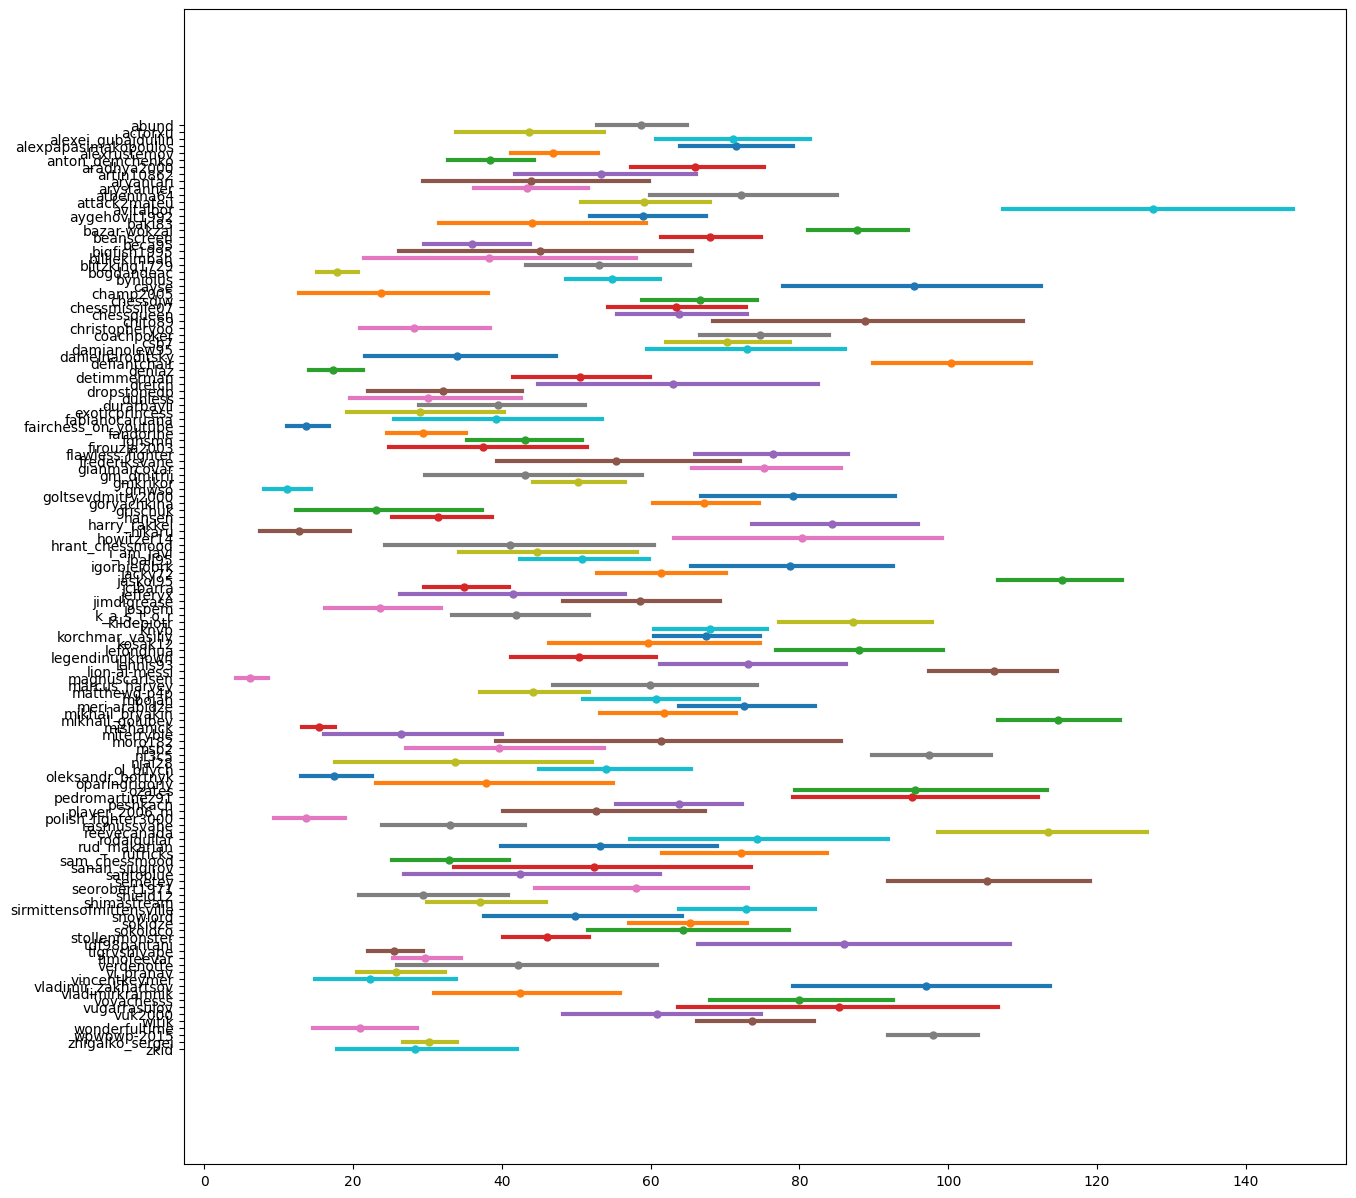

In [190]:
# Initialize list of plug-in summaries
summaries = []
# Iterate through groups and instantiate conf intervals
for label, group in over_30_games_players_df.groupby('player'):
    summaries.append(
      plugin_summary(
          group['place'].dropna().values, np.mean, label=label
      )
  )
fig = plot_conf_ints(summaries)
